In [24]:
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df = pd.read_csv('HVAC.csv')
df.head()

,datetime,SDH.CHW1.CHP3_CT,SDH.CHW2.CHP4_CT,SDH.CHW2.CHP5_CT,SDH.SCHWP1_VFD:CURRENT,SDH.SCHWP2_VFD:CURRENT,SDH.SCHWP1_VFD:POWER,SDH.SCHWP2_VFD:POWER,SDH.CHW1.CWP2_CT,SDH.CHW1.CWP4_CT,SDH.CHW2.CWP5_CT,SDH.CHW2.CWP6_CT,SDH.AH1A.SF_VFD:CURRENT,SDH.AH1B.SF_VFD:CURRENT,SDH.AH2A.RF_VFD:CURRENT,SDH.AH2B.SF_VFD:CURRENT,SDH.AH1A.SF_VFD:POWER,SDH.AH1B.SF_VFD:POWER,SDH.AH2A.RF_VFD:POWER,SDH.AH2B.SF_VFD:POWER
0,2023-10-31 09:04:25,0.026248,3.048749,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.352486,0.013124,1.273124,49.299999,49.000000,0.0,39.799999,30.600000,30.500000,0.0,10.799999
1,2023-10-31 09:14:25,0.026248,3.084373,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.307480,0.013124,1.273124,47.899998,48.599998,0.0,38.399998,31.100000,31.199999,0.0,10.700000
2,2023-10-31 09:24:27,0.026248,3.048749,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.307480,0.013124,1.278749,49.899998,48.299999,0.0,40.299999,29.900000,30.299999,0.0,10.599999
3,2023-10-31 09:34:27,0.026248,3.076874,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.352486,0.013124,1.278749,50.199997,48.500000,0.0,38.799999,30.199999,30.500000,0.0,10.900000
4,2023-10-31 09:44:27,0.026248,3.097498,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.412483,0.013124,1.278749,48.799999,48.799999,0.0,39.099998,30.500000,30.600000,0.0,11.000000


In [30]:
def get_pump(df, loop = "CHW"):

    if loop == "CHW":
    # Get chilled water loop
        keywords = {"pump":["CHP", "SCHWP"]}

        columns_with_keywords = {}
        # Identify columns containing the keywords
        for keyword in keywords:
            # Initialize a list to hold column names for this keyword
            columns_with_keywords[keyword] = []
            
            # Inner loop iterates over each column name in the DataFrame
            for col in df.columns:
                # Check if the keyword is in the column name

                for word in keywords[keyword]:
                    if word in col:
                        # If yes, append the column name to the list for this keyword
                        columns_with_keywords[keyword].append(col)

        # print("Columns with Keywords:")
        # print(columns_with_keywords)

        # Create sub DataFrames based on identified columns
        sub_dataframes = {}
        for keyword, cols in columns_with_keywords.items():
            # Include the first column ('ID') and the columns with the keyword
            selected_cols = ['datetime'] + cols
            sub_dataframes[keyword] = df[selected_cols]

        df_pump = sub_dataframes['pump'] 
    
    elif loop == "CW":
    # Get chilled water loop
        keywords = {"pump":["CWP"]}

        columns_with_keywords = {}
        # Identify columns containing the keywords
        for keyword in keywords:
            # Initialize a list to hold column names for this keyword
            columns_with_keywords[keyword] = []
            
            # Inner loop iterates over each column name in the DataFrame
            for col in df.columns:
                # Check if the keyword is in the column name

                for word in keywords[keyword]:
                    if word in col:
                        # If yes, append the column name to the list for this keyword
                        columns_with_keywords[keyword].append(col)

        # print("Columns with Keywords:")
        # print(columns_with_keywords)

        # Create sub DataFrames based on identified columns
        sub_dataframes = {}
        for keyword, cols in columns_with_keywords.items():
            # Include the first column ('ID') and the columns with the keyword
            selected_cols = ['datetime'] + cols
            sub_dataframes[keyword] = df[selected_cols]

        df_pump = sub_dataframes['pump']
    
    return df_pump

In [31]:
get_pump(df, "CW")

,datetime,SDH.CHW1.CWP2_CT,SDH.CHW1.CWP4_CT,SDH.CHW2.CWP5_CT,SDH.CHW2.CWP6_CT
0,2023-10-31 09:04:25,0.011247,63.352486,0.013124,1.273124
1,2023-10-31 09:14:25,0.011247,63.307480,0.013124,1.273124
2,2023-10-31 09:24:27,0.011247,63.307480,0.013124,1.278749
3,2023-10-31 09:34:27,0.011247,63.352486,0.013124,1.278749
4,2023-10-31 09:44:27,0.011247,63.412483,0.013124,1.278749
...,...,...,...,...,...
9471,NaN,NaN,NaN,NaN,NaN
9472,NaN,NaN,NaN,NaN,NaN
9473,NaN,NaN,NaN,NaN,NaN
9474,NaN,NaN,NaN,NaN,NaN


In [28]:
def make_plot(df, names = [], date = ''):
    df['datetime'] = pd.to_datetime(df['datetime'])

    if names == []:
        names = df.columns[1:]

    if date != '':
        df = df[df['datetime'].dt.date == pd.to_datetime(date)]

    plt.figure(figsize=(20, 10))

    # Plotting each column against the 'datetime'
    for column in names:
        plt.plot(df['datetime'], df[column], label = column)
        plt.title(f"{column}")
        plt.xlabel('Datetime')
        plt.ylabel('Value')
        plt.legend()

    plt.show()

In [29]:
def get_CT(df):
    keywords = {"current":["CURRENT", "CT"]}

    columns_with_keywords = {}
    # Identify columns containing the keywords
    for keyword in keywords:
        # Initialize a list to hold column names for this keyword
        columns_with_keywords[keyword] = []
        
        # Inner loop iterates over each column name in the DataFrame
        for col in df.columns:
            # Check if the keyword is in the column name

            for word in keywords[keyword]:
                if word in col:
                    # If yes, append the column name to the list for this keyword
                    columns_with_keywords[keyword].append(col)

    print("Columns with Keywords:")
    print(columns_with_keywords)

    # Create sub DataFrames based on identified columns
    sub_dataframes = {}
    for keyword, cols in columns_with_keywords.items():
        # Include the first column ('ID') and the columns with the keyword
        selected_cols = ['datetime'] + cols
        sub_dataframes[keyword] = df[selected_cols]

    df_current = sub_dataframes['current'] 
    return df_current

In [277]:
def get_power(df):
    keywords = {"power":['POWER', 'PWR']}

    columns_with_keywords = {}
    # Identify columns containing the keywords
    for keyword in keywords:
        # Initialize a list to hold column names for this keyword
        columns_with_keywords[keyword] = []
        
        # Inner loop iterates over each column name in the DataFrame
        for col in df.columns:
            # Check if the keyword is in the column name

            for word in keywords[keyword]:
                if word in col:
                    # If yes, append the column name to the list for this keyword
                    columns_with_keywords[keyword].append(col)

    print("Columns with Keywords:")
    print(columns_with_keywords)

    # Create sub DataFrames based on identified columns
    sub_dataframes = {}
    for keyword, cols in columns_with_keywords.items():
        # Include the first column ('ID') and the columns with the keyword
        selected_cols = ['datetime'] + cols
        sub_dataframes[keyword] = df[selected_cols]

    df_pwr = sub_dataframes['power']
    return df_pwr

In [278]:
def get_demand(df):
    # split into peak demand and power dataframe
    # Define the keywords
    keywords = ['DEMAND']

    # Identify columns containing the keywords
    columns_with_keywords = {keyword: [col for col in df.columns if keyword in col] for keyword in keywords}

    print("Columns with Keywords:")
    print(columns_with_keywords)

    # Create sub DataFrames based on identified columns
    sub_dataframes = {}
    for keyword, cols in columns_with_keywords.items():
        # Include the first column ('ID') and the columns with the keyword
        selected_cols = ['datetime'] + cols
        sub_dataframes[keyword] = df[selected_cols]

    df_DEMAND = sub_dataframes['DEMAND']
    return df_DEMAND

In [279]:
def get_substation(df, keyword = 'MSA.'):

    # Identify columns containing the keywords
    columns_with_keywords = {keyword: [col for col in df.columns if keyword in col]}

    print("Columns with Keywords:")
    print(columns_with_keywords)

    # Create sub DataFrames based on identified columns
    sub_dataframes = {}
    for keyword, cols in columns_with_keywords.items():
        # Include the first column ('ID') and the columns with the keyword
        selected_cols = ['datetime'] + cols
        sub_dataframes[keyword] = df[selected_cols]

    df_substation = sub_dataframes[keyword]
    return df_substation

In [280]:
df = pd.read_csv('HVAC.csv')
df.head()

,datetime,SDH.CHW1.CHP3_CT,SDH.CHW2.CHP4_CT,SDH.CHW2.CHP5_CT,SDH.SCHWP1_VFD:CURRENT,SDH.SCHWP2_VFD:CURRENT,SDH.SCHWP1_VFD:POWER,SDH.SCHWP2_VFD:POWER,SDH.CHW1.CWP2_CT,SDH.CHW1.CWP4_CT,SDH.CHW2.CWP5_CT,SDH.CHW2.CWP6_CT,SDH.AH1A.SF_VFD:CURRENT,SDH.AH1B.SF_VFD:CURRENT,SDH.AH2A.RF_VFD:CURRENT,SDH.AH2B.SF_VFD:CURRENT,SDH.AH1A.SF_VFD:POWER,SDH.AH1B.SF_VFD:POWER,SDH.AH2A.RF_VFD:POWER,SDH.AH2B.SF_VFD:POWER
0,2023-10-31 09:04:25,0.026248,3.048749,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.352486,0.013124,1.273124,49.299999,49.000000,0.0,39.799999,30.600000,30.500000,0.0,10.799999
1,2023-10-31 09:14:25,0.026248,3.084373,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.307480,0.013124,1.273124,47.899998,48.599998,0.0,38.399998,31.100000,31.199999,0.0,10.700000
2,2023-10-31 09:24:27,0.026248,3.048749,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.307480,0.013124,1.278749,49.899998,48.299999,0.0,40.299999,29.900000,30.299999,0.0,10.599999
3,2023-10-31 09:34:27,0.026248,3.076874,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.352486,0.013124,1.278749,50.199997,48.500000,0.0,38.799999,30.199999,30.500000,0.0,10.900000
4,2023-10-31 09:44:27,0.026248,3.097498,0.020624,0.0,11.299999,0.134,6.566,0.011247,63.412483,0.013124,1.278749,48.799999,48.799999,0.0,39.099998,30.500000,30.600000,0.0,11.000000


In [281]:
# date = '2023-11-25'
# names = ''
# df['datetime'] = pd.to_datetime(df['datetime'])

# if names == '':
#     names = df.columns[1:]

# if date != '':
#     df = df[df['datetime'].dt.date == pd.to_datetime(date)]

# plt.figure(figsize=(20, 10))

# # Plotting each column against the 'datetime'
# for column in names:
#     plt.plot(df['datetime'], df[column], label = column)
#     plt.title(f"{column}")
#     plt.xlabel('Datetime')
#     plt.ylabel('Value')
#     plt.legend()

# plt.show()

/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


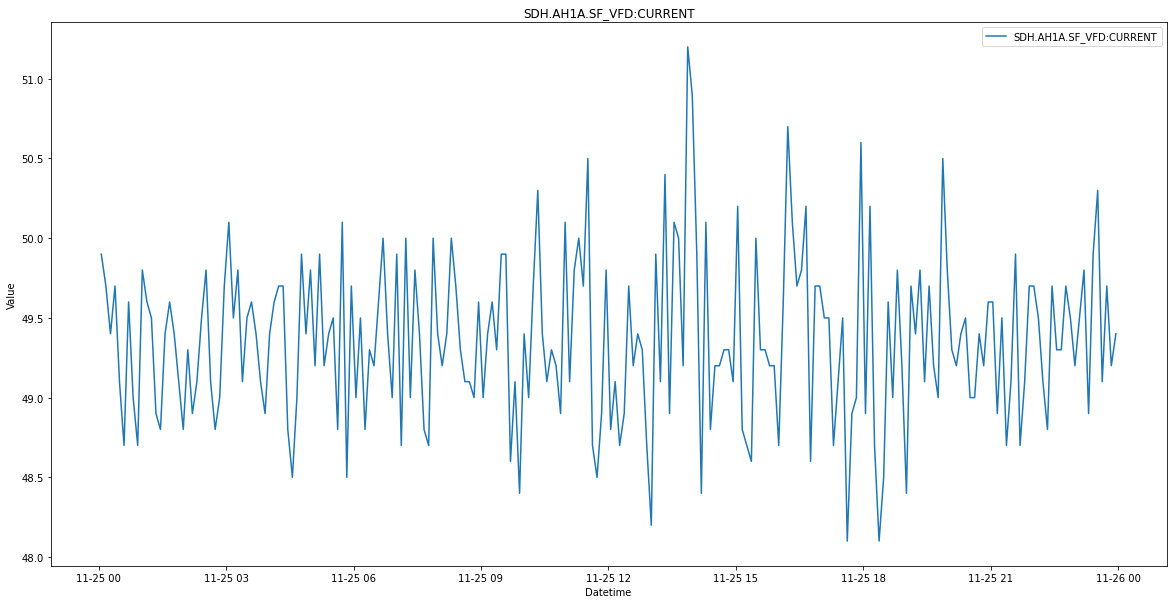

In [282]:
make_plot(df, names = ['SDH.AH1A.SF_VFD:CURRENT'], date = '2023-11-25')

In [283]:
get_power(df)

Columns with Keywords:
{'power': ['SDH.SCHWP1_VFD:POWER', 'SDH.SCHWP2_VFD:POWER', 'SDH.AH1A.SF_VFD:POWER', 'SDH.AH1B.SF_VFD:POWER', 'SDH.AH2A.RF_VFD:POWER', 'SDH.AH2B.SF_VFD:POWER']}


,datetime,SDH.SCHWP1_VFD:POWER,SDH.SCHWP2_VFD:POWER,SDH.AH1A.SF_VFD:POWER,SDH.AH1B.SF_VFD:POWER,SDH.AH2A.RF_VFD:POWER,SDH.AH2B.SF_VFD:POWER
0,2023-10-31 09:04:25,0.134,6.566,30.600000,30.500000,0.0,10.799999
1,2023-10-31 09:14:25,0.134,6.566,31.100000,31.199999,0.0,10.700000
2,2023-10-31 09:24:27,0.134,6.566,29.900000,30.299999,0.0,10.599999
3,2023-10-31 09:34:27,0.134,6.566,30.199999,30.500000,0.0,10.900000
4,2023-10-31 09:44:27,0.134,6.566,30.500000,30.600000,0.0,11.000000
...,...,...,...,...,...,...,...
9471,NaT,NaN,NaN,NaN,NaN,-999.0,10.099999
9472,NaT,NaN,NaN,NaN,NaN,-999.0,10.200000
9473,NaT,NaN,NaN,NaN,NaN,-999.0,10.500000
9474,NaT,NaN,NaN,NaN,NaN,-999.0,10.400000


In [285]:
get_CT(df)

Columns with Keywords:
{'current': ['SDH.CHW1.CHP3_CT', 'SDH.CHW2.CHP4_CT', 'SDH.CHW2.CHP5_CT', 'SDH.SCHWP1_VFD:CURRENT', 'SDH.SCHWP2_VFD:CURRENT', 'SDH.CHW1.CWP2_CT', 'SDH.CHW1.CWP4_CT', 'SDH.CHW2.CWP5_CT', 'SDH.CHW2.CWP6_CT', 'SDH.AH1A.SF_VFD:CURRENT', 'SDH.AH1B.SF_VFD:CURRENT', 'SDH.AH2A.RF_VFD:CURRENT', 'SDH.AH2B.SF_VFD:CURRENT']}


,datetime,SDH.CHW1.CHP3_CT,SDH.CHW2.CHP4_CT,SDH.CHW2.CHP5_CT,SDH.SCHWP1_VFD:CURRENT,SDH.SCHWP2_VFD:CURRENT,SDH.CHW1.CWP2_CT,SDH.CHW1.CWP4_CT,SDH.CHW2.CWP5_CT,SDH.CHW2.CWP6_CT,SDH.AH1A.SF_VFD:CURRENT,SDH.AH1B.SF_VFD:CURRENT,SDH.AH2A.RF_VFD:CURRENT,SDH.AH2B.SF_VFD:CURRENT
0,2023-10-31 09:04:25,0.026248,3.048749,0.020624,0.0,11.299999,0.011247,63.352486,0.013124,1.273124,49.299999,49.000000,0.0,39.799999
1,2023-10-31 09:14:25,0.026248,3.084373,0.020624,0.0,11.299999,0.011247,63.307480,0.013124,1.273124,47.899998,48.599998,0.0,38.399998
2,2023-10-31 09:24:27,0.026248,3.048749,0.020624,0.0,11.299999,0.011247,63.307480,0.013124,1.278749,49.899998,48.299999,0.0,40.299999
3,2023-10-31 09:34:27,0.026248,3.076874,0.020624,0.0,11.299999,0.011247,63.352486,0.013124,1.278749,50.199997,48.500000,0.0,38.799999
4,2023-10-31 09:44:27,0.026248,3.097498,0.020624,0.0,11.299999,0.011247,63.412483,0.013124,1.278749,48.799999,48.799999,0.0,39.099998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.0,39.299999
9472,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.0,38.199997
9473,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.0,39.699997
9474,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.0,38.399998


In [286]:
df = pd.read_csv('SW.csv')
df.head()

,datetime,SDH.SW.MSA.ATS-ES.PEAK DEMAND,SDH.SW.MSA.MS41B.PEAK DEMAND,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSB.MS41A.PEAK DEMAND,SDH.SW.MSB.ATS-EL.PEAK DEMAND,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSB.MAIN.PEAK DEMAND,SDH.SW.MSA.CD4RA.PEAK DEMAND,...,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSB.ATS-E02.REAL 3 PH,SDH.SW.MSA.MDC.PEAK DEMAND,SDH.SW.MSA.ATS-E1.PEAK DEMAND,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.MS41A.PEAK DEMAND,SDH.SW.MSB.ATS-E02.PEAK DEMAND,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-10-31 09:04:00,78999.0,0.0,23999.0,34999.0,0.0,109999.0,0.0,414999.0,100999.0,...,0.0,30999.0,39999.0,178999.0,0.0,407999.0,33999.0,26999.0,0.0,350999.0
1,2023-10-31 09:14:00,78999.0,0.0,24999.0,19999.0,0.0,109999.0,0.0,414999.0,100999.0,...,999.0,30999.0,39999.0,178999.0,0.0,407999.0,33999.0,26999.0,0.0,352999.0
2,2023-10-31 09:24:01,78999.0,0.0,24999.0,24999.0,0.0,109999.0,0.0,414999.0,100999.0,...,0.0,30999.0,39999.0,178999.0,0.0,407999.0,33999.0,21999.0,0.0,345999.0
3,2023-10-31 09:34:01,78999.0,0.0,24999.0,16999.0,0.0,109999.0,0.0,414999.0,100999.0,...,0.0,24999.0,39999.0,178999.0,0.0,407999.0,33999.0,23999.0,0.0,344999.0
4,2023-10-31 09:44:02,78999.0,0.0,23999.0,16999.0,0.0,109999.0,0.0,414999.0,100999.0,...,0.0,24999.0,39999.0,178999.0,0.0,407999.0,33999.0,22999.0,0.0,365999.0


In [287]:
get_substation(df, 'MSB.')

Columns with Keywords:
{'MSB.': ['SDH.SW.MSB.MS41A.PEAK DEMAND', 'SDH.SW.MSB.ATS-EL.PEAK DEMAND', 'SDH.SW.MSA.MSB.TIE.PWR REAL 3P', 'SDH.SW.MSB.MAIN.PEAK DEMAND', 'SDH.SW.MSB.MS41B.PWR REAL 3 P', 'SDH.SW.MSB.ATS-E2.PEAK DEMAND', 'SDH.SW.MSA.MSB.PEAK DEMAND', 'SDH.SW.MSA.MSB.PWR REAL 3 P', 'SDH.SW.MSB.ATS-EL.PWR REAL 3 P', 'SDH.SW.MSB.CB4A.PEAK DEMAND', 'SDH.SW.MSA.MSB.TIE.PEAK DEMAND', 'SDH.SW.MSB.CB4A.PWR REAL 3 P', 'SDH.SW.MSB.MS41B.PEAK DEMAND', 'SDH.SW.MSB.ATS-E02.REAL 3 PH', 'SDH.SW.MSB.ATS-E02.PEAK DEMAND', 'SDH.SW.MSB.MS41A.PWR REAL 3 P', 'SDH.SW.MSB.MAIN.PWR REAL 3 P']}


,datetime,SDH.SW.MSB.MS41A.PEAK DEMAND,SDH.SW.MSB.ATS-EL.PEAK DEMAND,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSB.MAIN.PEAK DEMAND,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSB.ATS-E2.PEAK DEMAND,SDH.SW.MSA.MSB.PEAK DEMAND,SDH.SW.MSA.MSB.PWR REAL 3 P,SDH.SW.MSB.ATS-EL.PWR REAL 3 P,SDH.SW.MSB.CB4A.PEAK DEMAND,SDH.SW.MSA.MSB.TIE.PEAK DEMAND,SDH.SW.MSB.CB4A.PWR REAL 3 P,SDH.SW.MSB.MS41B.PEAK DEMAND,SDH.SW.MSB.ATS-E02.REAL 3 PH,SDH.SW.MSB.ATS-E02.PEAK DEMAND,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-10-31 09:04:00,0.0,109999.0,0.0,414999.0,151999.0,33999.0,0.0,0.0,91999.0,78999.0,0.0,64999.0,212999.0,30999.0,33999.0,0.0,350999.0
1,2023-10-31 09:14:00,0.0,109999.0,0.0,414999.0,150999.0,33999.0,0.0,0.0,91999.0,78999.0,0.0,63999.0,212999.0,30999.0,33999.0,0.0,352999.0
2,2023-10-31 09:24:01,0.0,109999.0,0.0,414999.0,144999.0,33999.0,0.0,0.0,95999.0,78999.0,0.0,67999.0,212999.0,30999.0,33999.0,0.0,345999.0
3,2023-10-31 09:34:01,0.0,109999.0,0.0,414999.0,151999.0,33999.0,0.0,0.0,83999.0,78999.0,0.0,69999.0,212999.0,24999.0,33999.0,0.0,344999.0
4,2023-10-31 09:44:02,0.0,109999.0,0.0,414999.0,151999.0,33999.0,0.0,0.0,92999.0,78999.0,0.0,66999.0,212999.0,24999.0,33999.0,0.0,365999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,2023-12-29 07:33:36,0.0,109999.0,0.0,414999.0,175999.0,33999.0,0.0,0.0,107999.0,78999.0,0.0,39999.0,212999.0,30999.0,33999.0,0.0,355999.0
9476,2023-12-29 07:39:36,0.0,109999.0,0.0,414999.0,176999.0,33999.0,0.0,0.0,93999.0,78999.0,0.0,38999.0,212999.0,24999.0,33999.0,0.0,345999.0
9477,2023-12-29 07:45:39,0.0,109999.0,0.0,414999.0,176999.0,33999.0,0.0,0.0,98999.0,78999.0,0.0,39999.0,212999.0,30999.0,33999.0,0.0,350999.0
9478,2023-12-29 07:51:42,0.0,109999.0,0.0,414999.0,176999.0,33999.0,0.0,0.0,102999.0,78999.0,0.0,40999.0,212999.0,24999.0,33999.0,0.0,355999.0


In [288]:
get_power(df)

Columns with Keywords:
{'power': ['SDH.SW.MSA.CD4RA.PWR REAL 3 P', 'SDH.SW.MSA.ATS-ES.PWR REAL 3 P', 'SDH.SW.MSA.MSB.TIE.PWR REAL 3P', 'SDH.SW.MSA.MS41A.PWR REAL 3 P', 'SDH.SW.MSA.MDC.PWR REAL 3 P', 'SDH.SW.MSA.ATS-E2.PWR REAL 3 P', 'SDH.SW.MSB.MS41B.PWR REAL 3 P', 'SDH.SW.MSA.MAIN.PWR REAL 3 P', 'SDH.SW.MSA.MSB.PWR REAL 3 P', 'SDH.SW.MSB.ATS-EL.PWR REAL 3 P', 'SDH.SW.MSA.ATS-E1.PWR REAL 3 P', 'SDH.SW.MSB.CB4A.PWR REAL 3 P', 'SDH.SW.MSA.CH-2.PWR REAL 3 P', 'SDH.SW.MSA.MS41B.PWR REAL 3 P', 'SDH.SW.MSA.CD41A.PWR REAL 3 P', 'SDH.SW.MSB.MS41A.PWR REAL 3 P', 'SDH.SW.MSB.MAIN.PWR REAL 3 P']}


,datetime,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSA.MS41A.PWR REAL 3 P,SDH.SW.MSA.MDC.PWR REAL 3 P,SDH.SW.MSA.ATS-E2.PWR REAL 3 P,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSA.MAIN.PWR REAL 3 P,SDH.SW.MSA.MSB.PWR REAL 3 P,SDH.SW.MSB.ATS-EL.PWR REAL 3 P,SDH.SW.MSA.ATS-E1.PWR REAL 3 P,SDH.SW.MSB.CB4A.PWR REAL 3 P,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-10-31 09:04:00,23999.0,34999.0,0.0,331999.0,32999.0,30999.0,151999.0,539999.0,0.0,91999.0,126999.0,64999.0,0.0,0.0,26999.0,0.0,350999.0
1,2023-10-31 09:14:00,24999.0,19999.0,0.0,336999.0,32999.0,30999.0,150999.0,539999.0,0.0,91999.0,126999.0,63999.0,999.0,0.0,26999.0,0.0,352999.0
2,2023-10-31 09:24:01,24999.0,24999.0,0.0,335999.0,32999.0,30999.0,144999.0,536999.0,0.0,95999.0,126999.0,67999.0,0.0,0.0,21999.0,0.0,345999.0
3,2023-10-31 09:34:01,24999.0,16999.0,0.0,340999.0,33999.0,24999.0,151999.0,534999.0,0.0,83999.0,126999.0,69999.0,0.0,0.0,23999.0,0.0,344999.0
4,2023-10-31 09:44:02,23999.0,16999.0,0.0,340999.0,31999.0,24999.0,151999.0,537999.0,0.0,92999.0,131999.0,66999.0,0.0,0.0,22999.0,0.0,365999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,2023-12-29 07:33:36,22999.0,35999.0,0.0,337999.0,26999.0,30999.0,175999.0,535999.0,0.0,107999.0,138999.0,39999.0,999.0,0.0,22999.0,0.0,355999.0
9476,2023-12-29 07:39:36,23999.0,32999.0,0.0,340999.0,28999.0,24999.0,176999.0,547999.0,0.0,93999.0,133999.0,38999.0,999.0,0.0,22999.0,0.0,345999.0
9477,2023-12-29 07:45:39,25999.0,12999.0,0.0,335999.0,27999.0,30999.0,176999.0,519999.0,0.0,98999.0,135999.0,39999.0,999.0,0.0,20999.0,0.0,350999.0
9478,2023-12-29 07:51:42,24999.0,13999.0,0.0,338999.0,27999.0,24999.0,176999.0,520999.0,0.0,102999.0,134999.0,40999.0,0.0,0.0,19999.0,0.0,355999.0


In [289]:
get_demand(df)

Columns with Keywords:
{'DEMAND': ['SDH.SW.MSA.ATS-ES.PEAK DEMAND', 'SDH.SW.MSA.MS41B.PEAK DEMAND', 'SDH.SW.MSB.MS41A.PEAK DEMAND', 'SDH.SW.MSB.ATS-EL.PEAK DEMAND', 'SDH.SW.MSB.MAIN.PEAK DEMAND', 'SDH.SW.MSA.CD4RA.PEAK DEMAND', 'SDH.SW.MSA.CH-2.PEAK DEMAND', 'SDH.SW.MSB.ATS-E2.PEAK DEMAND', 'SDH.SW.MSA.MSB.PEAK DEMAND', 'SDH.SW.MSA.MAIN.PEAK DEMAND', 'SDH.SW.MSB.CB4A.PEAK DEMAND', 'SDH.SW.MSA.MSB.TIE.PEAK DEMAND', 'SDH.SW.MSB.MS41B.PEAK DEMAND', 'SDH.SW.MSA.CD41A.PEAK DEMAND', 'SDH.SW.MSA.MDC.PEAK DEMAND', 'SDH.SW.MSA.ATS-E1.PEAK DEMAND', 'SDH.SW.MSA.MS41A.PEAK DEMAND', 'SDH.SW.MSB.ATS-E02.PEAK DEMAND']}


,datetime,SDH.SW.MSA.ATS-ES.PEAK DEMAND,SDH.SW.MSA.MS41B.PEAK DEMAND,SDH.SW.MSB.MS41A.PEAK DEMAND,SDH.SW.MSB.ATS-EL.PEAK DEMAND,SDH.SW.MSB.MAIN.PEAK DEMAND,SDH.SW.MSA.CD4RA.PEAK DEMAND,SDH.SW.MSA.CH-2.PEAK DEMAND,SDH.SW.MSB.ATS-E2.PEAK DEMAND,SDH.SW.MSA.MSB.PEAK DEMAND,SDH.SW.MSA.MAIN.PEAK DEMAND,SDH.SW.MSB.CB4A.PEAK DEMAND,SDH.SW.MSA.MSB.TIE.PEAK DEMAND,SDH.SW.MSB.MS41B.PEAK DEMAND,SDH.SW.MSA.CD41A.PEAK DEMAND,SDH.SW.MSA.MDC.PEAK DEMAND,SDH.SW.MSA.ATS-E1.PEAK DEMAND,SDH.SW.MSA.MS41A.PEAK DEMAND,SDH.SW.MSB.ATS-E02.PEAK DEMAND
0,2023-10-31 09:04:00,78999.0,0.0,0.0,109999.0,414999.0,100999.0,326999.0,33999.0,0.0,917999.0,78999.0,0.0,212999.0,61999.0,39999.0,178999.0,407999.0,33999.0
1,2023-10-31 09:14:00,78999.0,0.0,0.0,109999.0,414999.0,100999.0,326999.0,33999.0,0.0,917999.0,78999.0,0.0,212999.0,61999.0,39999.0,178999.0,407999.0,33999.0
2,2023-10-31 09:24:01,78999.0,0.0,0.0,109999.0,414999.0,100999.0,326999.0,33999.0,0.0,917999.0,78999.0,0.0,212999.0,61999.0,39999.0,178999.0,407999.0,33999.0
3,2023-10-31 09:34:01,78999.0,0.0,0.0,109999.0,414999.0,100999.0,326999.0,33999.0,0.0,917999.0,78999.0,0.0,212999.0,61999.0,39999.0,178999.0,407999.0,33999.0
4,2023-10-31 09:44:02,78999.0,0.0,0.0,109999.0,414999.0,100999.0,326999.0,33999.0,0.0,917999.0,78999.0,0.0,212999.0,61999.0,39999.0,178999.0,407999.0,33999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,2023-12-29 07:33:36,78999.0,0.0,0.0,109999.0,414999.0,100999.0,326999.0,33999.0,0.0,917999.0,78999.0,0.0,212999.0,61999.0,39999.0,178999.0,407999.0,33999.0
9476,2023-12-29 07:39:36,78999.0,0.0,0.0,109999.0,414999.0,100999.0,326999.0,33999.0,0.0,917999.0,78999.0,0.0,212999.0,61999.0,39999.0,178999.0,407999.0,33999.0
9477,2023-12-29 07:45:39,78999.0,0.0,0.0,109999.0,414999.0,100999.0,326999.0,33999.0,0.0,917999.0,78999.0,0.0,212999.0,61999.0,39999.0,178999.0,407999.0,33999.0
9478,2023-12-29 07:51:42,78999.0,0.0,0.0,109999.0,414999.0,100999.0,326999.0,33999.0,0.0,917999.0,78999.0,0.0,212999.0,61999.0,39999.0,178999.0,407999.0,33999.0


In [290]:
get_CT(df)

Columns with Keywords:
{'current': []}


,datetime
0,2023-10-31 09:04:00
1,2023-10-31 09:14:00
2,2023-10-31 09:24:01
3,2023-10-31 09:34:01
4,2023-10-31 09:44:02
...,...
9475,2023-12-29 07:33:36
9476,2023-12-29 07:39:36
9477,2023-12-29 07:45:39
9478,2023-12-29 07:51:42


/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


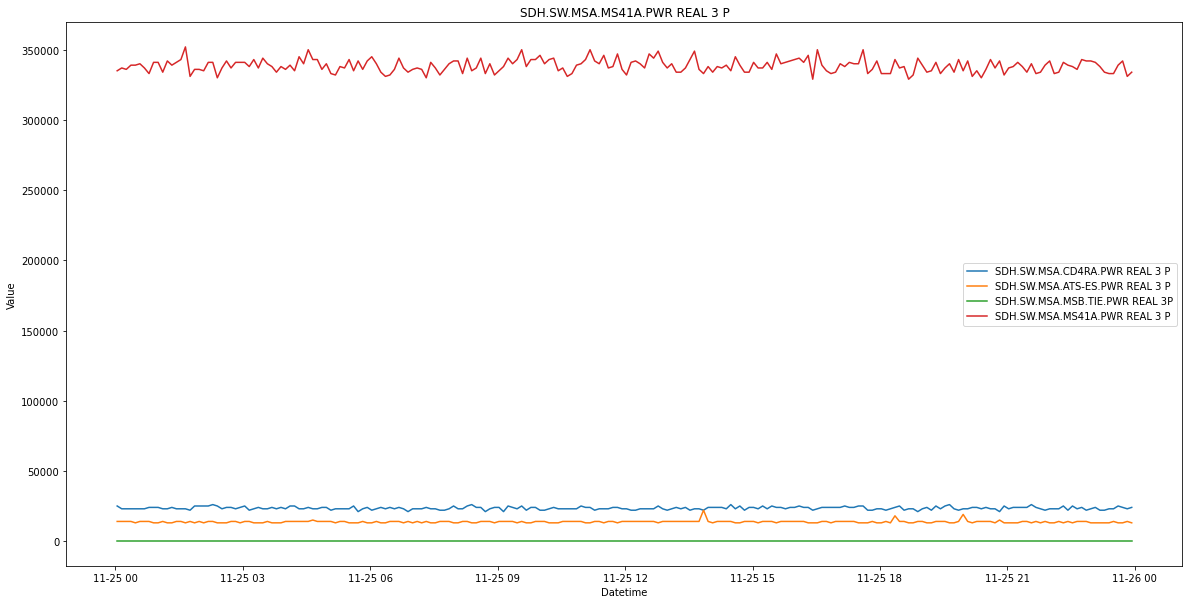

In [293]:
make_plot(df, names = ['SDH.SW.MSA.CD4RA.PWR REAL 3 P', 'SDH.SW.MSA.ATS-ES.PWR REAL 3 P', 'SDH.SW.MSA.MSB.TIE.PWR REAL 3P', 'SDH.SW.MSA.MS41A.PWR REAL 3 P'], date = '2023-11-25')